In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
airQ_data = pd.read_csv('../Datasets/AirQuality/AQData_monthly_2014_2019.csv', low_memory =False)
airQ_data.tail()

,AirQualityIndex,Year,MonthNo,MonthName,Zone,Station,Value
2173,aqi,2019,7,Jul,Santa Clara Valley,San Martin - Airport,0.0
2174,aqi,2019,8,Aug,Santa Clara Valley,San Martin - Airport,0.0
2175,aqi,2019,9,Sep,Santa Clara Valley,San Martin - Airport,0.0
2176,aqi,2019,10,Oct,Santa Clara Valley,San Martin - Airport,0.0
2177,aqi,2019,11,Nov,Santa Clara Valley,San Martin - Airport,0.0


In [3]:
#monthly -> yearly Mean value: method 1
airQ_data_mean = airQ_data.groupby(['AirQualityIndex','Year','Zone','Station'])['Value'].mean().reset_index()
airQ_data_mean.head()

,AirQualityIndex,Year,Zone,Station,Value
0,aqi,2014,Coast & Central Bay,Berkeley Aquatic Park,0.000000
1,aqi,2014,Coast & Central Bay,Crockett - Kendall Ave.,0.000000
2,aqi,2014,Coast & Central Bay,Laney College,60.636364
3,aqi,2014,Coast & Central Bay,Oakland East,64.636364
4,aqi,2014,Coast & Central Bay,Oakland West,66.727273


In [4]:
#monthly -> yearly Mean value: method 2
airQ_data_mean1 = airQ_data.groupby(['AirQualityIndex','Year','Zone','Station'], as_index=False)['Value'].mean()
airQ_data_mean1.head()

,AirQualityIndex,Year,Zone,Station,Value
0,aqi,2014,Coast & Central Bay,Berkeley Aquatic Park,0.000000
1,aqi,2014,Coast & Central Bay,Crockett - Kendall Ave.,0.000000
2,aqi,2014,Coast & Central Bay,Laney College,60.636364
3,aqi,2014,Coast & Central Bay,Oakland East,64.636364
4,aqi,2014,Coast & Central Bay,Oakland West,66.727273


In [18]:
#dropping 0 values
indexNames = airQ_data_mean[ (airQ_data_mean['Value'] == 0.000000)].index
airQ_data_mean.drop(indexNames , inplace=True)
airQ_data_mean.head()


,AirQualityIndex,Year,Zone,Station,Value
2,aqi,2014,Coast & Central Bay,Laney College,60.636364
3,aqi,2014,Coast & Central Bay,Oakland East,64.636364
4,aqi,2014,Coast & Central Bay,Oakland West,66.727273
8,aqi,2014,Coast & Central Bay,San Francisco - Arkansas St.,61.454545
9,aqi,2014,Coast & Central Bay,San Pablo - Rumrill,67.545455


In [19]:
len(airQ_data_mean)

100

In [21]:
county_station = pd.read_csv('../Datasets/county_station.csv',low_memory=False)
county_station.head()

,No,Station,County
0,1,Berkeley Aquatic Park,Alameda
1,2,Bethel Island,Contra Costa
2,3,Concord,Contra Costa
3,4,Crockett - Kendall Ave.,Houston
4,5,Fairfield - Chadbourne Rd.,Solano


In [22]:
county_station = county_station.drop('No',axis=1)
county_station

,Station,County
0,Berkeley Aquatic Park,Alameda
1,Bethel Island,Contra Costa
2,Concord,Contra Costa
3,Crockett - Kendall Ave.,Houston
4,Fairfield - Chadbourne Rd.,Solano
5,Forest Knolls,Marin
6,Gilroy,Santa Clara
7,Hayward,Alameda
8,Laney College,Alameda
9,Livermore - Rincon Ave.,Alameda


In [23]:
airQ_data_mean = pd.merge(airQ_data_mean,county_station, on='Station')

In [24]:
airQ_data_mean

,AirQualityIndex,Year,Zone,Station,Value,County
0,aqi,2014,Coast & Central Bay,Laney College,60.636364,Alameda
1,aqi,2015,Coast & Central Bay,Laney College,68.272727,Alameda
2,aqi,2016,Coast & Central Bay,Laney College,57.909091,Alameda
3,aqi,2017,Coast & Central Bay,Laney College,81.909091,Alameda
4,aqi,2018,Coast & Central Bay,Laney College,90.181818,Alameda
...,...,...,...,...,...,...
89,aqi,2017,Coast & Central Bay,Berkeley Aquatic Park,75.454545,Alameda
90,aqi,2018,Coast & Central Bay,Berkeley Aquatic Park,86.454545,Alameda
91,aqi,2019,Coast & Central Bay,Berkeley Aquatic Park,61.727273,Alameda
92,aqi,2018,Eastern Zone,Pleasanton - Owens Ct.,64.000000,Alameda


In [25]:
# we won't use this data
ashtma_data4 = pd.read_csv('../Datasets/Disease cases/asthma-4/Asthmadata_by_county_2014_2017.csv', low_memory=False)
ashtma_data4.head()

,CountyName,CountyCode,Year,AgeAdjRate,Lower95%,Upper95%,Total
0,Marin,6041,2014,25.2,23.3,27.3,643.0
1,Placer,6061,2014,29.4,27.7,31.2,0.0
2,Santa Clara,6085,2014,30.3,29.6,31.1,0.0
3,Lassen,6035,2014,30.5,24.9,37.0,103.0
4,Orange,6059,2014,31.3,30.7,31.9,0.0


In [40]:
#we will use this asthma4 data
ashtma4 = pd.read_csv('../Datasets/Disease cases/asthma-4/asthma_2014_17_final.csv', low_memory=False)
ashtma4.head()

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year
0,6000,48.5,48.5,48.7,"186,540",2014
1,6001,63.2,62.0,64.5,"9,909",2014
2,6003,NaN,NaN,NaN,NaN,2014
3,6005,61.9,54.1,70.4,227,2014
4,6007,43.8,41.1,46.6,978,2014


In [41]:
#county-countycode mapping file
county_code = pd.read_csv('../Datasets/Disease cases/asthma-4/County_codes.csv',low_memory=False)
county_code.head()

,County,CountyCode
0,Alameda,6001
1,Amador,6005
2,Butte,6007
3,Calaveras,6009
4,California/Statewide,6000


In [42]:
#merging asthma4 data with county code data to get county names

ashtma4_final = pd.merge(ashtma4,county_code, on='CountyCode')
ashtma4_final.head()

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,County
0,6000,48.5,48.5,48.7,"186,540",2014,California/Statewide
1,6000,49.4,49.4,49.6,"191,480",2015,California/Statewide
2,6000,44.2,44.2,44.5,"174,119",2016,California/Statewide
3,6000,45.2,45.2,45.4,"179,503",2017,California/Statewide
4,6001,63.2,62.0,64.5,"9,909",2014,Alameda


In [43]:
ashtma4_final['County'].unique()

array(['California/Statewide', 'Alameda ', 'Amador ', 'Butte ',
       'Calaveras ', 'Colusa ', 'Contra Costa ', 'Del Norte ',
       'El Dorado ', 'Fresno ', 'Glenn ', 'Humboldt ', 'Imperial ',
       'Inyo ', 'Kern ', 'Kings ', 'Lake ', 'Lassen ', 'Los Angeles ',
       'Madera ', 'Marin ', 'Mariposa ', 'Mendocino ', 'Merced ',
       'Modoc ', 'Mono ', 'Monterey ', 'Napa ', 'Nevada ', 'Orange ',
       'Placer ', 'Plumas ', 'Riverside ', 'Sacramento ', 'San Benito ',
       'San Bernardino ', 'San Diego ', 'San Francisco ', 'San Joaquin ',
       'San Luis Obispo ', 'San Mateo ', 'Santa Barbara ', 'Santa Clara ',
       'Santa Cruz ', 'Shasta ', 'Siskiyou ', 'Solano ', 'Sonoma ',
       'Stanislaus ', 'Sutter ', 'Tehama ', 'Trinity ', 'Tulare ',
       'Tuolumne ', 'Ventura ', 'Yolo ', 'Yuba '], dtype=object)

In [44]:
ashtma4_final['County'] = ashtma4_final['County'].str.strip()
ashtma4_final['County']

0      California/Statewide
1      California/Statewide
2      California/Statewide
3      California/Statewide
4                   Alameda
               ...         
223                    Yolo
224                    Yuba
225                    Yuba
226                    Yuba
227                    Yuba
Name: County, Length: 228, dtype: object

In [45]:
ashtma4_final

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,County
0,6000,48.5,48.5,48.7,"186,540",2014,California/Statewide
1,6000,49.4,49.4,49.6,"191,480",2015,California/Statewide
2,6000,44.2,44.2,44.5,"174,119",2016,California/Statewide
3,6000,45.2,45.2,45.4,"179,503",2017,California/Statewide
4,6001,63.2,62.0,64.5,"9,909",2014,Alameda
...,...,...,...,...,...,...,...
223,6113,40.4,37.8,43.2,890,2017,Yolo
224,6115,43.4,38.8,48.4,323,2014,Yuba
225,6115,45.6,40.9,50.7,345,2015,Yuba
226,6115,38.9,34.6,43.6,296,2016,Yuba


In [46]:
airQ_data_mean['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [47]:
#merging AQ data && asthma4 data

merged = pd.merge(airQ_data_mean,ashtma4_final,how='inner', left_on=['Year', 'County'], right_on=['Year','County'])

In [48]:
merged['Patient_count'] = merged['Patient_count'].str.replace(',','').astype(int)

In [49]:
merged

,AirQualityIndex,Year,Zone,Station,Value,County,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count
0,aqi,2014,Coast & Central Bay,Laney College,60.636364,Alameda,6001,63.2,62.0,64.5,9909
1,aqi,2014,Coast & Central Bay,Oakland East,64.636364,Alameda,6001,63.2,62.0,64.5,9909
2,aqi,2014,Coast & Central Bay,Oakland West,66.727273,Alameda,6001,63.2,62.0,64.5,9909
3,aqi,2014,Eastern Zone,Livermore - Rincon Ave.,57.454545,Alameda,6001,63.2,62.0,64.5,9909
4,aqi,2015,Coast & Central Bay,Laney College,68.272727,Alameda,6001,62.9,61.7,64.2,9929
...,...,...,...,...,...,...,...,...,...,...,...
56,aqi,2016,Santa Clara Valley,San Jose - Jackson St.,58.000000,Santa Clara,6085,28.6,27.9,29.4,5522
57,aqi,2016,Santa Clara Valley,San Jose - Knox Ave.,59.909091,Santa Clara,6085,28.6,27.9,29.4,5522
58,aqi,2017,Santa Clara Valley,Gilroy,49.545455,Santa Clara,6085,30.0,29.2,30.7,5849
59,aqi,2017,Santa Clara Valley,San Jose - Jackson St.,72.636364,Santa Clara,6085,30.0,29.2,30.7,5849


In [50]:
merged2_filtered = ashtma4_final[ashtma4_final['County'] == 'Santa Clara']

In [51]:
merged2_filtered

,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Year,County
168,6085,30.3,29.6,31.1,"5,643",2014,Santa Clara
169,6085,34.8,33.9,35.6,"6,514",2015,Santa Clara
170,6085,28.6,27.9,29.4,"5,522",2016,Santa Clara
171,6085,30.0,29.2,30.7,"5,849",2017,Santa Clara


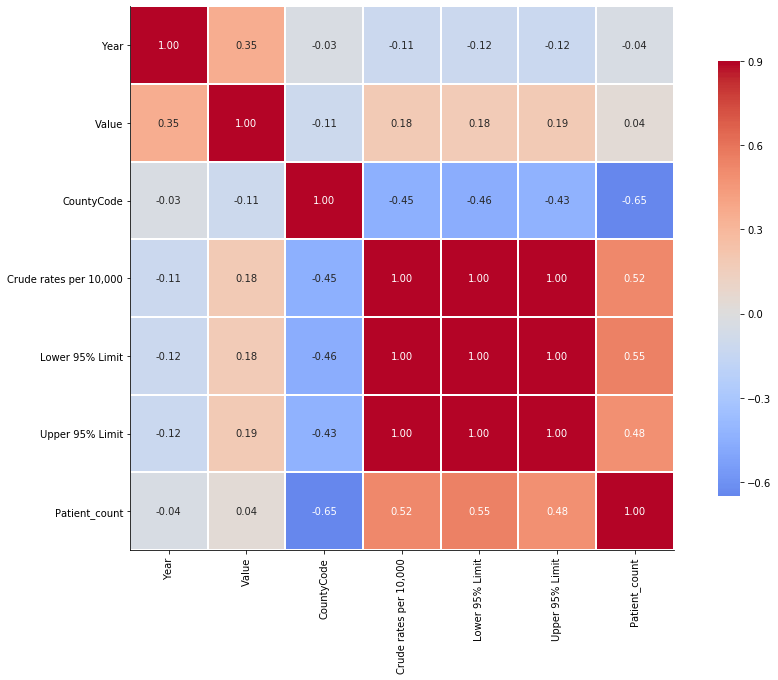

In [52]:
corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

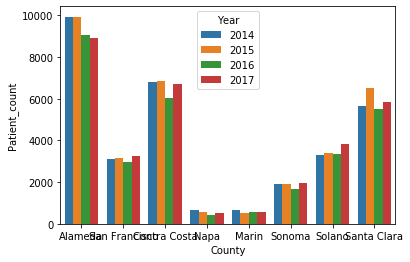

In [53]:
sns.barplot(x='County', y='Patient_count', hue='Year', data=merged, saturation=0.8)


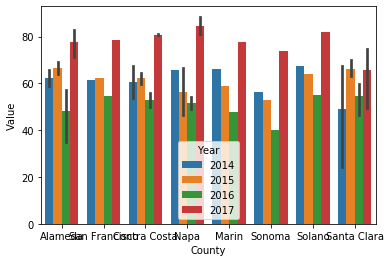

In [54]:
sns.barplot(x='County', y='Value', hue='Year', data=merged, saturation=0.8)



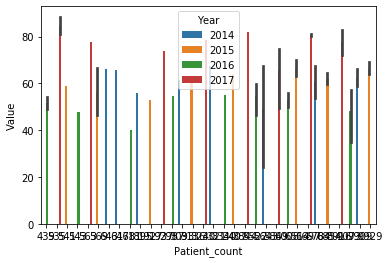

In [55]:
sns.barplot(x='Patient_count', y='Value', hue='Year', data=merged, saturation=0.8)



In [56]:
merged

,AirQualityIndex,Year,Zone,Station,Value,County,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count
0,aqi,2014,Coast & Central Bay,Laney College,60.636364,Alameda,6001,63.2,62.0,64.5,9909
1,aqi,2014,Coast & Central Bay,Oakland East,64.636364,Alameda,6001,63.2,62.0,64.5,9909
2,aqi,2014,Coast & Central Bay,Oakland West,66.727273,Alameda,6001,63.2,62.0,64.5,9909
3,aqi,2014,Eastern Zone,Livermore - Rincon Ave.,57.454545,Alameda,6001,63.2,62.0,64.5,9909
4,aqi,2015,Coast & Central Bay,Laney College,68.272727,Alameda,6001,62.9,61.7,64.2,9929
...,...,...,...,...,...,...,...,...,...,...,...
56,aqi,2016,Santa Clara Valley,San Jose - Jackson St.,58.000000,Santa Clara,6085,28.6,27.9,29.4,5522
57,aqi,2016,Santa Clara Valley,San Jose - Knox Ave.,59.909091,Santa Clara,6085,28.6,27.9,29.4,5522
58,aqi,2017,Santa Clara Valley,Gilroy,49.545455,Santa Clara,6085,30.0,29.2,30.7,5849
59,aqi,2017,Santa Clara Valley,San Jose - Jackson St.,72.636364,Santa Clara,6085,30.0,29.2,30.7,5849


In [57]:
#county population file
county_population = pd.read_csv('../Datasets/Disease cases/asthma-4/county_population.csv',low_memory=False)
county_population.head()

,County,Year,Population
0,Alameda,2014,"1,588,576"
1,Alpine,2014,"1,163"
2,Amador,2014,"37,815"
3,Butte,2014,"223,137"
4,Calaveras,2014,"45,358"


In [58]:
#remove comma from Population column
county_population['Population'] = county_population['Population'].str.replace(',','').astype(int)
county_population.head()

,County,Year,Population
0,Alameda,2014,1588576
1,Alpine,2014,1163
2,Amador,2014,37815
3,Butte,2014,223137
4,Calaveras,2014,45358


In [59]:
#merging merged data && county_population data to get population column

merged = pd.merge(merged,county_population,how='inner', left_on=['Year', 'County'], right_on=['Year','County'])
merged.head()

,AirQualityIndex,Year,Zone,Station,Value,County,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population
0,aqi,2014,Coast & Central Bay,Laney College,60.636364,Alameda,6001,63.2,62.0,64.5,9909,1588576
1,aqi,2014,Coast & Central Bay,Oakland East,64.636364,Alameda,6001,63.2,62.0,64.5,9909,1588576
2,aqi,2014,Coast & Central Bay,Oakland West,66.727273,Alameda,6001,63.2,62.0,64.5,9909,1588576
3,aqi,2014,Eastern Zone,Livermore - Rincon Ave.,57.454545,Alameda,6001,63.2,62.0,64.5,9909,1588576
4,aqi,2015,Coast & Central Bay,Laney College,68.272727,Alameda,6001,62.9,61.7,64.2,9929,1611770


In [60]:
#Calculating patient ratio

merged['Patient_ratio'] = merged['Patient_count']/merged['Population']
merged.head()

,AirQualityIndex,Year,Zone,Station,Value,County,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population,Patient_ratio
0,aqi,2014,Coast & Central Bay,Laney College,60.636364,Alameda,6001,63.2,62.0,64.5,9909,1588576,0.006238
1,aqi,2014,Coast & Central Bay,Oakland East,64.636364,Alameda,6001,63.2,62.0,64.5,9909,1588576,0.006238
2,aqi,2014,Coast & Central Bay,Oakland West,66.727273,Alameda,6001,63.2,62.0,64.5,9909,1588576,0.006238
3,aqi,2014,Eastern Zone,Livermore - Rincon Ave.,57.454545,Alameda,6001,63.2,62.0,64.5,9909,1588576,0.006238
4,aqi,2015,Coast & Central Bay,Laney College,68.272727,Alameda,6001,62.9,61.7,64.2,9929,1611770,0.006160


In [61]:
#Calculating patient percentage

merged['Patient_percent%'] = merged['Patient_ratio']* 100
merged.head()

,AirQualityIndex,Year,Zone,Station,Value,County,CountyCode,"Crude rates per 10,000",Lower 95% Limit,Upper 95% Limit,Patient_count,Population,Patient_ratio,Patient_percent%
0,aqi,2014,Coast & Central Bay,Laney College,60.636364,Alameda,6001,63.2,62.0,64.5,9909,1588576,0.006238,0.623766
1,aqi,2014,Coast & Central Bay,Oakland East,64.636364,Alameda,6001,63.2,62.0,64.5,9909,1588576,0.006238,0.623766
2,aqi,2014,Coast & Central Bay,Oakland West,66.727273,Alameda,6001,63.2,62.0,64.5,9909,1588576,0.006238,0.623766
3,aqi,2014,Eastern Zone,Livermore - Rincon Ave.,57.454545,Alameda,6001,63.2,62.0,64.5,9909,1588576,0.006238,0.623766
4,aqi,2015,Coast & Central Bay,Laney College,68.272727,Alameda,6001,62.9,61.7,64.2,9929,1611770,0.006160,0.616031


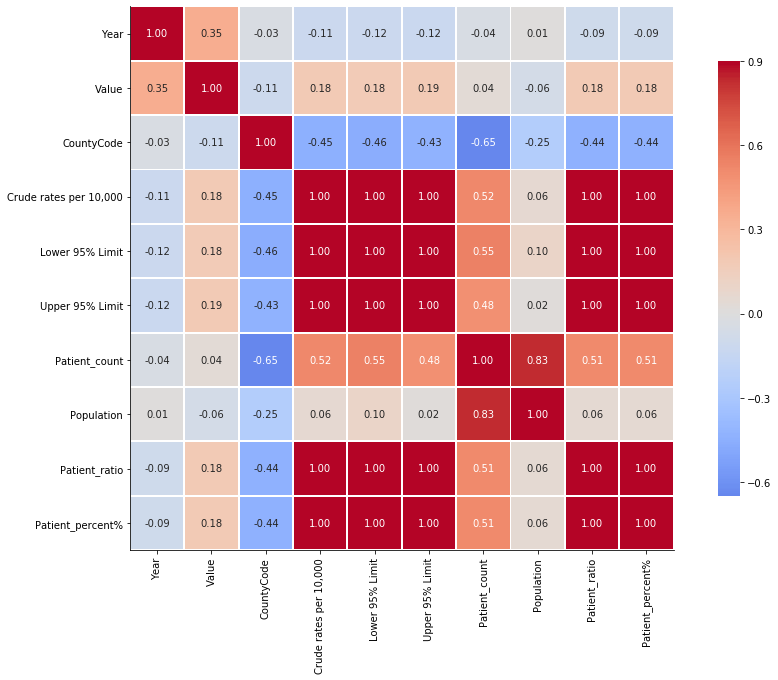

In [62]:
#again measuring the correlation 

corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)